In [6]:
#Example of multiclass prediction using text variables
# https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f
import pandas as pd
import numpy as np
df1 = pd.read_csv('C:/Users/melyg/Desktop/Networks/Data/fields_for_model_repec.csv')
print(df1.shape)
df = df1.sample(frac =.6)
print(df.shape)
df.head()

(141776, 12)
(85066, 12)


,pubyear,pubjournal,pubtitle,econfield,field2,field_1,field_2,field_3,field_4,field_5,field_6,field2str
37892,2019,vanderbilt university department of economics,economic implications of new technologies for ...,Theory,Theory,otherf,otherf,otherf,theory,otherf,otherf,theory
73413,2009,university of chicago press,making the grade: the economic evolution of am...,Public economics,Applied micro,otherf,otherf,apmicro,otherf,otherf,otherf,applied micro
68591,2017,journal of financial and quantitative analysis,key human capital,Business and finance,Business and finance,otherf,otherf,otherf,otherf,busfin,otherf,business and finance
2370,1999,columbia university working paper,a carbon sequestration supply function and dev...,Development economics,Applied micro,otherf,otherf,apmicro,otherf,otherf,otherf,applied micro
131517,2002,southern economic journal,"transaction costs and the present value"" puzzl...",Agricultural and environment,Applied micro,otherf,otherf,apmicro,otherf,otherf,otherf,applied micro


In [7]:
#We need only two columns, cleaning and dictionaries
from io import StringIO

col = ['field2str','pubjournal', 'pubtitle']
df = df[col]
df = df[pd.notnull(df['pubtitle'])] #removes null values
df = df[pd.notnull(df['pubjournal'])] #removes null values
df.columns = ['field2str', 'pubjournal', 'pubtitle']
df['category_id'] = df['field2str'].factorize()[0] #Assigns a number to categories starting at zero
category_id_df = df[['field2str', 'category_id']].drop_duplicates().sort_values('category_id') #Descriptive table of number of categories and number of cases
category_to_id = dict(category_id_df.values) #dictionary of categories
id_to_category = dict(category_id_df[['category_id', 'field2str']].values)  #dictionary of categories
df.tail()

,field2str,pubjournal,pubtitle,category_id
49897,macroeconomics,available at ssrn,fluctuations in economic uncertainty and trans...,3
30890,applied micro,bjep monograph series ii number development an...,developmental regulation across the life span:...,1
7025,applied micro,information economics and policy,access pricing with unregulated downstream com...,1
13319,applied micro,rand corporation www rand orgcontentdamrandpub...,assessing alternative modifications to the aff...,1
68223,applied micro,measuring wealth and financial intermediation ...,"jorgenson, dw, 136, 137n8, 145",1


In [8]:
#Checking 
array = df['category_id'].to_numpy()
print(np.unique(array, return_counts=True))
frequency = df.category_id.value_counts()
print(frequency)

(array([0, 1, 2, 3, 4, 5], dtype=int64), array([ 3436, 44580,  6186, 22781,  4848,  3235], dtype=int64))
1    44580
3    22781
2     6186
4     4848
0     3436
5     3235
Name: category_id, dtype: int64


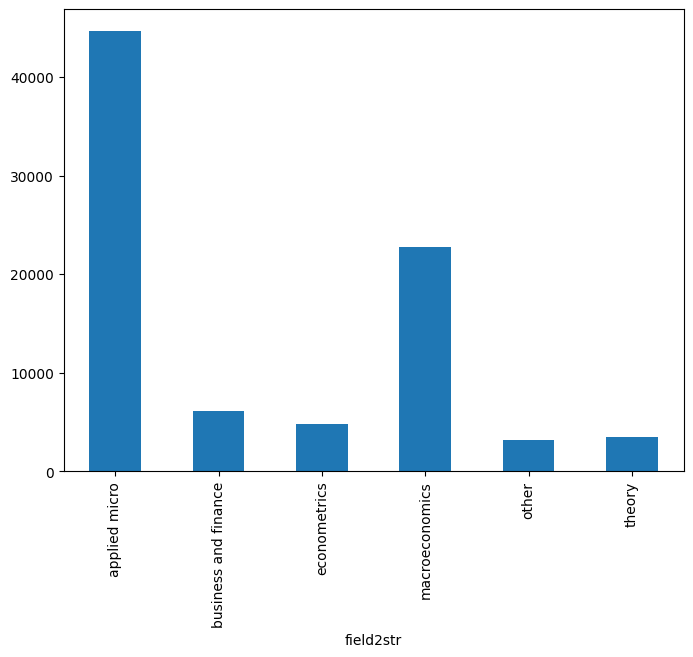

In [4]:
#Imbalanced clases (visualization)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('field2str').pubtitle.count().plot.bar(ylim=0)
plt.show()

In [9]:
#Text representation: texts are converted to a more manageable representation
#Use the bag of words model: a model where for each document (text var) the presence (and often the frequency) of words is taken into consideration, but the order in which they occur is ignored
#we will calculate a measure called Term Frequency, Inverse Document Frequency, abbreviated to tf-idf using "sklearn.feature_extraction.text.TfidfVectorizer"

# sublinear_df is set to True to use a logarithmic form for frequency.
# min_df is the minimum numbers of documents a word must be present in to be kept.
# norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1.
# ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams.
# stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features.

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features1 = tfidf.fit_transform(df.pubtitle).toarray()
labels = array
print(features1.shape)
del array


(85066, 21118)


In [ ]:
#We can use sklearn.feature_selection.chi2 to find the terms that are the most correlated with each of the products
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for field2str, category_id in sorted(category_to_id.items()):
  features_chi2_1 = chi2(features1, labels == category_id)
  indices_1 = np.argsort(features_chi2_1[0])
  feature_names_1 = np.array(tfidf.get_feature_names_out())[indices_1]
  unigrams_1 = [v for v in feature_names_1 if len(v.split(' ')) == 1]
  bigrams_1 = [v for v in feature_names_1 if len(v.split(' ')) == 2]
  print("# '{}':".format(field2str))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams_1[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams_1[-N:])))

In [10]:
#Do same for pubjournal
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features2 = tfidf.fit_transform(df.pubjournal).toarray()
print(features2.shape)

(85066, 7624)


In [ ]:
#Do same for pubjournal
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for field2str, category_id in sorted(category_to_id.items()):
  features_chi2_2 = chi2(features2, labels == category_id)
  indices_2 = np.argsort(features_chi2_2[0])
  feature_names_2 = np.array(tfidf.get_feature_names_out())[indices_2]
  unigrams_2 = [v for v in feature_names_2 if len(v.split(' ')) == 1]
  bigrams_2 = [v for v in feature_names_2 if len(v.split(' ')) == 2]
  print("# '{}':".format(field2str))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams_2[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams_2[-N:])))

In [11]:
#Creating one array for features
features_final = np.concatenate((features1, features2), axis=1)
features_final.shape

(85066, 28742)

In [12]:
# Multiclass
#Naive Bayes Classifier (using only pubtitle)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['pubtitle'], df['field2str'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [13]:
print(clf.predict(count_vect.transform(["a regulatory policy strategy for protecting immigrant workers"])))
print(clf.predict(count_vect.transform(["a relative question: the developing world is reevaluating what it means to be poor"])))
print(clf.predict(count_vect.transform(["10 central bank independence: growing threats"])))

['applied micro']
['applied micro']
['macroeconomics']


In [14]:
#Deleting previous files to deal with memory problems
del df1
del features1, features2

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
   #LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features_final, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

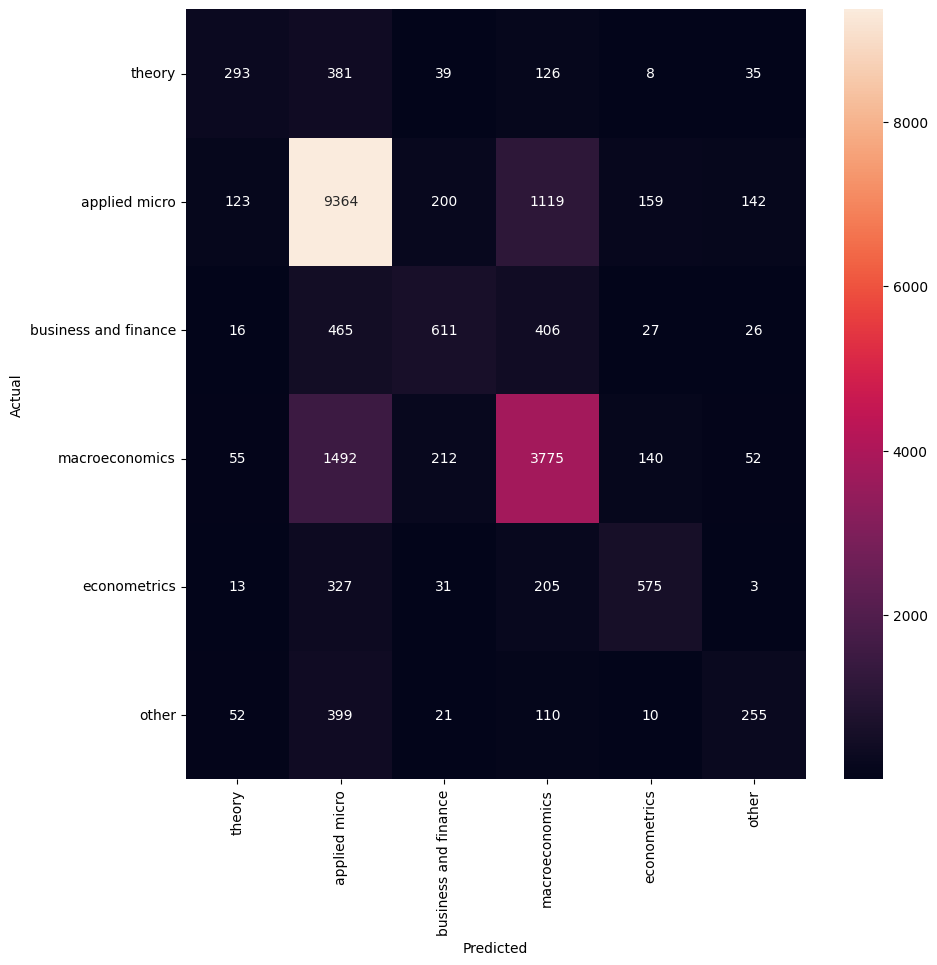

In [15]:
#Using the best model
from sklearn.svm import LinearSVC
import seaborn as sns
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features_final, labels, df.index, test_size=0.25, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.field2str.values, yticklabels=category_id_df.field2str.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]])
      print('')

In [16]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.33      0.41       882
           1       0.75      0.84      0.80     11107
           2       0.55      0.39      0.46      1551
           3       0.66      0.66      0.66      5726
           4       0.63      0.50      0.55      1154
           5       0.50      0.30      0.38       847

    accuracy                           0.70     21267
   macro avg       0.60      0.50      0.54     21267
weighted avg       0.69      0.70      0.69     21267



In [17]:
df1 = pd.read_csv('C:/Users/melyg/Desktop/Networks/Data/fields_for_model_repec.csv')
print(df1.shape)
df2 = df1.sample(frac =.5)
print(df2.shape)
df2.head()

(122901, 7)
(61450, 7)


,pubyear,repec,field_cv,pubtitle,pubjournal,__000000,sample1
117402,2008,pwi122,economics,a voluntary brain-drain tax,journal of public economics,0.195545,0.0
101842,2005,psh69,na,the life-cycle personal accounts proposal for ...,nber working papers,0.550872,NaN
22839,2010,pch902,economics,"age at arrival, english proficiency, and socia...",american economic journal: applied economics,0.971690,NaN
29151,2011,pdr111,"economics, business, and policy",data impediments to empirical work on health i...,the b.e. journal of economic analysis & policy,0.118558,0.0
99253,2004,psc44,economics,optimal operational monetary policy in the chr...,cepr discussion papers,0.462522,0.0


In [23]:
col = ['pubjournal', 'pubtitle']
df2 = df2[col]
df2 = df2[pd.notnull(df2['pubtitle'])] #removes null values
df2 = df2[pd.notnull(df2['pubjournal'])] #removes null values

In [24]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features3 = tfidf.fit_transform(df2.pubjournal).toarray()
print(features3.shape)
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features4 = tfidf.fit_transform(df2.pubtitle).toarray()
print(features4.shape)

(61414, 2919)
(61414, 16160)


In [26]:
del features_final
features_final = np.concatenate((features3, features4), axis=1)
features_final.shape

(61414, 19079)

In [27]:
y_pred_miss = model.predict(features_final)

ValueError: X has 19079 features, but LinearSVC is expecting 28742 features as input.